In [1]:
# Final on Neighborhos in Sri Lanka
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb_0         150 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         392 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

In [2]:
pip install requests beautifulsoup4


     |████████████████████████████████| 122kB 6.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geocoder


     |████████████████████████████████| 102kB 15.6MB/s ta 0:00:01
     |████████████████████████████████| 829kB 7.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lxml

     |████████████████████████████████| 5.5MB 21.9MB/s eta 0:00:01     |█████████▉                      | 1.7MB 21.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Read Bucharest sector data from wikipedia
from bs4 import BeautifulSoup
import requests


url='https://en.wikipedia.org/wiki/Colombo'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [6]:
# Read Colombo neighborhood data
#Identify table data
data = []
gdp_table = soup.find_all('table', class_ = 'wikitable')
gdp_table = gdp_table[1]

sectorPopList = []
sectorAreaList = []

#Pass data into dataset        
for row in gdp_table.find_all('tr'):
    i=0
    for cell in row.find_all('td'):
        i+=1
        if i==1:
            sectorPopList.append(cell.text.replace("\n",""))
        if i==2: 
            sectorAreaList.append(cell.text.replace("\n",""))    
            i=0
df_sectorPop = pd.DataFrame({"Postalnumber": sectorPopList, "Neigborhoods": sectorAreaList})
df_sectorPop=df_sectorPop.drop([0],axis=0)
df_sectorPop.reset_index(inplace = True)
df_sectorPop=df_sectorPop.drop("index",axis=1)
df_sectorPop
            

,Postalnumber,Neigborhoods
0,Colombo 1,Fort
1,Colombo 2,"Slave Island, Union Place"
2,Colombo 3,Kollupitiya
3,Colombo 4,Bambalapitiya
4,Colombo 5,"Havelock Town, Kirulapana, Kirilapone North"
5,Colombo 6,"Wellawatte, Pamankada,"
6,Colombo 7,Cinnamon Gardens
7,Colombo 8,Borella
8,Colombo 9,Dematagoda
9,Colombo 10,"Maradana, Panchikawatte"


In [7]:
#set postal number of neighborhoods
df_neighborhood = pd.DataFrame(df_sectorPop.Neigborhoods.str.split(',').tolist(),index=df_sectorPop.Postalnumber).stack()
df_neighborhood = df_neighborhood.reset_index([0, 'Postalnumber'])
df_neighborhood.columns = ['Postalnumber', 'Neighborhood']
df_neighborhood = df_neighborhood.drop(10)
df_neighborhood = df_neighborhood.reset_index()
df_neighborhood = df_neighborhood.drop('index',axis=1)
df_neighborhood



,Postalnumber,Neighborhood
0,Colombo 1,Fort
1,Colombo 2,Slave Island
2,Colombo 2,Union Place
3,Colombo 3,Kollupitiya
4,Colombo 4,Bambalapitiya
5,Colombo 5,Havelock Town
6,Colombo 5,Kirulapana
7,Colombo 5,Kirilapone North
8,Colombo 6,Wellawatte
9,Colombo 6,Pamankada


In [8]:
# get coordinates of Colombo
colombo_address = 'Colombo, Sri Lanka'

geolocator = Nominatim(user_agent="colombo_explorer")
location = geolocator.geocode(colombo_address)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(colombo_address, latitude, longitude))

The geograpical coordinate of Colombo, Sri Lanka are 6.9349969, 79.8538463.


In [9]:
import geocoder

# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,colombo_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Postalnumber,Neighborhood,Latitude,Longitude
0,Colombo 1,Fort,6.94148,79.84664
1,Colombo 2,Slave Island,6.92695,79.85006
2,Colombo 2,Union Place,6.91878,79.86113
3,Colombo 3,Kollupitiya,6.91293,79.85128
4,Colombo 4,Bambalapitiya,6.90471,79.85507


In [10]:
# create map of Colombo using latitude and longitude values
map_colombo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colombo)  
    
map_colombo

In [10]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'QW14X50SRCOL4M2JFKLMRYJDBVVJ0HPYYNHQIKB4ZIHRAYU5' # your Foursquare ID
CLIENT_SECRET = 'INAM3LORZMBJ2DAHCBNXKMQNLPQWSPQBKQPG2SLO5AVXEHAB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QW14X50SRCOL4M2JFKLMRYJDBVVJ0HPYYNHQIKB4ZIHRAYU5
CLIENT_SECRET:INAM3LORZMBJ2DAHCBNXKMQNLPQWSPQBKQPG2SLO5AVXEHAB


In [12]:
#Explore the first neighborhood in our dataframe
df_neighborhood.loc[0, 'Neighborhood']

'Fort'

In [12]:
# Get the neighborhood's latitude and longitude values
neighborhood_latitude1 = df_neighborhood.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude1 = df_neighborhood.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_neighborhood.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude1, 
                                                               neighborhood_longitude1))

Latitude and longitude values of Fort are 6.94148000000007, 79.84664000000004.


In [13]:
#let's get the top 100 venues that are in Colombo within a radius of 750 meters
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 750 # define radius

# create URL
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude1, 
    neighborhood_longitude1, 
    radius, 
    LIMIT)
url1 # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QW14X50SRCOL4M2JFKLMRYJDBVVJ0HPYYNHQIKB4ZIHRAYU5&client_secret=INAM3LORZMBJ2DAHCBNXKMQNLPQWSPQBKQPG2SLO5AVXEHAB&v=20180605&ll=6.94148000000007,79.84664000000004&radius=750&limit=100'

In [14]:
#Explore Neighborhoods in Colombo name
#Create a function to repeat the same process to all the neighborhoods in Colombo name places
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'Venue ID',                             
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#Indentify neighborhood and create a new dataframe called colombo_venues
colombo_venues = getNearbyVenues(names=df_neighborhood['Neighborhood'],
                                   latitudes=df_neighborhood['Latitude'],
                                   longitudes=df_neighborhood['Longitude']
                                  )


In [15]:
print(colombo_venues.shape)
colombo_venues.head()

(753, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
0,Fort,6.94148,79.84664,Ganesh Textiles,502f7a83e4b078fb5980021a,6.937328,79.850066,Clothing Store
1,Fort,6.94148,79.84664,Colombo Gold Centre,5409b341498ea79b0094078f,6.940518,79.852865,Jewelry Store
2,Fort,6.94148,79.84664,Pettah Market,52fc74f2498e44aedb25d237,6.936947,79.850936,Market
3,Fort,6.94148,79.84664,Hameedia,4e8319b8f9f49808a77d1be9,6.938036,79.851798,Men's Store
4,Fort,6.94148,79.84664,Logos Hope,522197e711d230e73eed765f,6.941497,79.844721,Boat or Ferry


In [16]:
#Calculate how many venues were returned for each neighborhood
colombo_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue ID,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Bloemendhal,4,4,4,4,4,4,4
Kirilapone North,26,26,26,26,26,26,26
Kirulapana,25,25,25,25,25,25,25
Madampitiya,6,6,6,6,6,6,6
Mattakkuliya,6,6,6,6,6,6,6
Modara,5,5,5,5,5,5,5
Pamankada,34,34,34,34,34,34,34
Panchikawatte,20,20,20,20,20,20,20
Union Place,76,76,76,76,76,76,76


In [17]:
print('There are {} uniques categories.'.format(len(colombo_venues['Venue Category'].unique())))

There are 148 uniques categories.


In [18]:
#Count each venue category and display top 10 categories
venuetable = colombo_venues[['Venue ID','Venue Category']].drop_duplicates().groupby('Venue Category').count()[['Venue ID']].rename(columns={"Venue ID": "Count"}).sort_values(by=['Count'], ascending=False)
venuetable.head(10)

,Count
Venue Category,
Hotel,29
Restaurant,26
Bakery,26
Coffee Shop,22
Clothing Store,22
Café,21
Indian Restaurant,17
Fast Food Restaurant,16
Chinese Restaurant,16


In [19]:
# Filter restaurants 

restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place','Food Court','Breakfast Spot','Food & Drink Shop','Hot Dog Joint','Taco Place','Food Truck','Noodle House']
thai_restaurant_list = ['Thai Restaurant']


colombo_venues['RestFlag']=False
for restCat in restaurant_list:
    colombo_venues['RestFlag'] = colombo_venues['RestFlag'] | colombo_venues['Venue Category'].str.contains(restCat)
    
neighborhood_restaurants = colombo_venues[colombo_venues['RestFlag'] == True].iloc[:,:-1]
thai_restaurants = neighborhood_restaurants[ neighborhood_restaurants['Venue Category'].isin(thai_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['Venue Category'].isin(thai_restaurant_list) ]

#Count restaur
print('Total number of restaurants:', len(neighborhood_restaurants['Venue ID'].unique()))
print('Total number of Thai restaurants:', len(thai_restaurants['Venue ID'].unique()))
print('Percentage of Thai restaurants: {:.2f}%'.format(len(thai_restaurants['Venue ID'].unique()) / len(neighborhood_restaurants['Venue ID'].unique()) * 100))




Total number of restaurants: 189
Total number of Thai restaurants: 7
Percentage of Thai restaurants: 3.70%


In [20]:
#Count all the restaurants types

restvenuetable = neighborhood_restaurants[['Venue ID','Venue Category']].drop_duplicates().groupby('Venue Category').count()[['Venue ID']].rename(columns={"Venue ID": "Count"}).sort_values(by=['Count'], ascending=False)
restvenuetable.head(15)

,Count
Venue Category,
Restaurant,26
Café,21
Indian Restaurant,17
Chinese Restaurant,16
Fast Food Restaurant,16
Asian Restaurant,15
Seafood Restaurant,9
Sri Lankan Restaurant,8
Vegetarian / Vegan Restaurant,8


In [21]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "RestaurantCount"})[['RestaurantCount']]
#df_rest_counts.shape

#find neighborhoods that does not have any restaurant 
noRestList = list(set(colombo_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

# get counts of Thai restaurants in each Neighborhood
df_thai_rest_counts =  thai_restaurants.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "ThaiRestaurantCount"})[['ThaiRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(colombo_venues['Neighborhood']) - set(thai_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_thai_rest_counts = df_thai_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'ThaiRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

#create data with restaurant counts and Thai restaurant counts
df_thai_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_thai_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

df_rest_counts

,RestaurantCount,ThaiRestaurantCount
Neighborhood,,
Bambalapitiya,37,2
Kollupitiya,34,1
Havelock Town,28,1
Wellawatte,26,1
Union Place,21,0
Cinnamon Gardens,19,1
Pamankada,14,0
Kirulapana,8,0
Borella,7,0


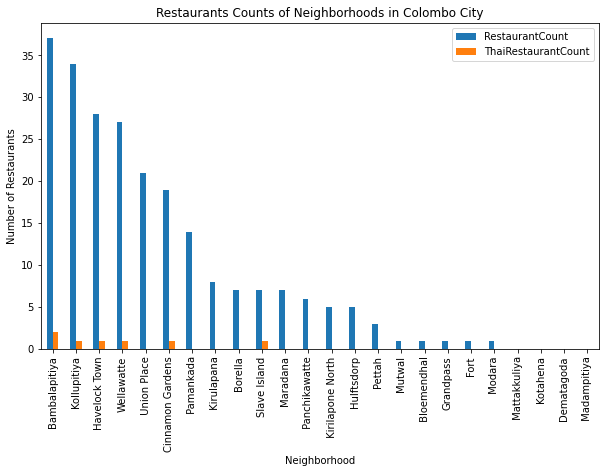

In [24]:
#plot above table info

import matplotlib as mpl
import matplotlib.pyplot as plt

# step 2: plot data
df_rest_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Restaurants') # add y-label to the plot
plt.title('Restaurants Counts of Neighborhoods in Colombo City') # add title to the plot

plt.show()

In [22]:
# create map of Colombo using latitude and longitude values
map_colombo1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add other reseturents as blue markers to map
for lat, lng, neighborhood, name in zip(other_restaurants['Venue Latitude'], other_restaurants['Venue Longitude'], other_restaurants['Neighborhood'],other_restaurants['Venue']):
    label = folium.Popup(str(name) + ' - ' + str(neighborhood), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
#        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_colombo1)  

# add thai reseturents as red markers to map
for lat, lng, neighborhood, name in zip(thai_restaurants['Venue Latitude'], thai_restaurants['Venue Longitude'], thai_restaurants['Neighborhood'],thai_restaurants['Venue']):
    label = folium.Popup(str(name) + ' - ' + str(neighborhood), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_colombo1)  

    

map_colombo1

In [23]:
#Analyze Each Neighborhood
# one hot encoding
colombo_onehot = pd.get_dummies(colombo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
colombo_onehot['Neighborhood'] = colombo_venues['Neighborhood'] 

#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
vunues_grouped = colombo_onehot.groupby('Neighborhood').mean().reset_index()

vunues_grouped.head()


 

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,Bar,Beach,Bed & Breakfast,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Casino,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Department Store,Design Studio,Dessert Shop,Diner,Dive Spot,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,General Entertainment,General Travel,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Lingerie Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Lab,Pizza Place,Platform,Playground,Pool,Pool Hall,Pub,Resort,Rest Area,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Snack Place,Soccer Field,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Track,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Water Park,Women's Store
0,Bloemendhal,0.0,0.000000,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Kirilapone North,0.0,0.038462,0.0,0.0,0.038462,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.115385,0.000000,0.0,0.076923,0.038462,0.0,0.0,0.00,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.038462,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.00,0.0,0.076923,0.0,0.038462,0.0,0.0,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.038462,0.0,0.00,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Kirulapana,0.0,0.000000,0.0,0.0,0.040000,0.0,0.08,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.000000,0.0,0.080000,0.000000,0.0,0.0,0.04,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.040000,0.0,0.0,0.04,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.040000,

In [24]:
vunues_grouped.shape

(24, 149)

In [25]:
# Let's put that into a pandas dataframe

# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = vunues_grouped['Neighborhood']

for ind in np.arange(vunues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vunues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bloemendhal,Sports Bar,Playground,Asian Restaurant,Bus Station,Donut Shop,Fondue Restaurant,Flower Shop,Flea Market,Fish & Chips Shop,Fast Food Restaurant
1,Kirilapone North,Bus Station,Coffee Shop,Pizza Place,Café,Hotel,Kids Store,Office,Park,Playground,Camera Store
2,Kirulapana,Hotel,Asian Restaurant,Café,Coffee Shop,Flea Market,Middle Eastern Restaurant,Sandwich Place,Donut Shop,Movie Theater,Spa
3,Madampitiya,Bus Station,Bakery,Harbor / Marina,Bus Stop,Rest Area,Dive Spot,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store
4,Mattakkuliya,Bakery,Beach,Park,Gym,Rest Area,Supermarket,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Electronics Store


In [26]:
# Cluster Neighborhoods

#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

vunues_grouped__clustering = vunues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vunues_grouped__clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 3, 1, 1, 0, 0, 0, 0], dtype=int32)

In [27]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cluster_merged = df_neighborhood

# merge neighborhoods_venues_sorted with df_neighborhood to add latitude/longitude for each neighborhood
cluster_merged = cluster_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

cluster_merged

,Postalnumber,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Colombo 1,Fort,6.941480,79.84664,0,Men's Store,Flea Market,Boat or Ferry,Market,Jewelry Store,Clothing Store,Food Truck,Design Studio,Dessert Shop,Diner
1,Colombo 2,Slave Island,6.926950,79.85006,0,Hotel,Coffee Shop,Bar,Chinese Restaurant,Italian Restaurant,Gym / Fitness Center,Seafood Restaurant,Restaurant,Buffet,Pub
2,Colombo 2,Union Place,6.918780,79.86113,0,Restaurant,Bakery,Pharmacy,Fast Food Restaurant,Spa,Café,Office,Japanese Restaurant,Ice Cream Shop,Diner
3,Colombo 3,Kollupitiya,6.912930,79.85128,0,Hotel,Coffee Shop,Clothing Store,Asian Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Shopping Mall,Restaurant,Indian Restaurant,Food Court
4,Colombo 4,Bambalapitiya,6.904710,79.85507,0,Restaurant,Chinese Restaurant,Hotel,Coffee Shop,Café,Bakery,Indian Restaurant,Fast Food Restaurant,Dessert Shop,Casino
5,Colombo 5,Havelock Town,6.887580,79.86256,0,Bakery,Clothing Store,Vegetarian / Vegan Restaurant,Chinese Restaurant,Athletics & Sports,Café,Indian Restaurant,Restaurant,Cricket Ground,Coffee Shop
6,Colombo 5,Kirulapana,6.878482,79.87206,0,Hotel,Asian Restaurant,Café,Coffee Shop,Flea Market,Middle Eastern Restaurant,Sandwich Place,Donut Shop,Movie Theater,Spa
7,Colombo 5,Kirilapone North,6.881350,79.87592,0,Bus Station,Coffee Shop,Pizza Place,Café,Hotel,Kids Store,Office,Park,Playground,Camera Store
8,Colombo 6,Wellawatte,6.879270,79.85992,0,Indian Restaurant,Asian Restaurant,Hotel,Seafood Restaurant,Clothing Store,Bakery,Café,Cocktail Bar,Food & Drink Shop,Restaurant
9,Colombo 6,Pamankada,6.879540,79.86937,0,Indian Restaurant,Food & Drink Shop,Café,Fast Food Restaurant,Coffee Shop,Hotel,Cricket Ground,Sandwich Place,Bus Station,Pizza Place


In [28]:
#Visualize the clusters 

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_merged['Latitude'], cluster_merged['Longitude'], cluster_merged['Neighborhood'], cluster_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [31]:
#get number of 1st Most Common Venues for each cluster

cluster_merged.groupby(['Cluster Labels','1st Most Common Venue' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

Neighborhood Count
Cluster Labels 1st Most Common Venue                    
0              Bakery                                  2
               Bus Station                             1
               Café                                    1
               Clothing Store                          1
               Gym                                     1
               Hotel                                   3
               Indian Restaurant                       2
               Jewelry Store                           2
               Men's Store                             1
               Office                                  1
               Restaurant                              2
1              Bakery                                  3
               Cricket Ground                          1
2              Stadium                                 1
3              Bus Station                             1
4              Sports Bar                              1

In [32]:
#get number of 2nd Most Common Venues for each cluster
cluster_merged.groupby(['Cluster Labels','2nd Most Common Venue' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

Neighborhood Count
Cluster Labels 2nd Most Common Venue                            
0              Art Gallery                                     1
               Asian Restaurant                                2
               Bakery                                          1
               Chinese Restaurant                              1
               Clothing Store                                  1
               Coffee Shop                                     3
               Flea Market                                     1
               Food & Drink Shop                               1
               Indian Restaurant                               1
               Office                                          2
               Restaurant                                      1
               Vegetarian / Vegan Restaurant                   1
               Women's Store                                   1
1              Beach                                           2
               Cricket Ground                                  1
               Diner                                           1
2              Volleyball Court                                1
3              Bakery                                          1
4              Playground                                      1